In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 데이터 불러오기기
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [7]:
# 학습한 결과로 트리를 생성 - tree.out 파일을 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

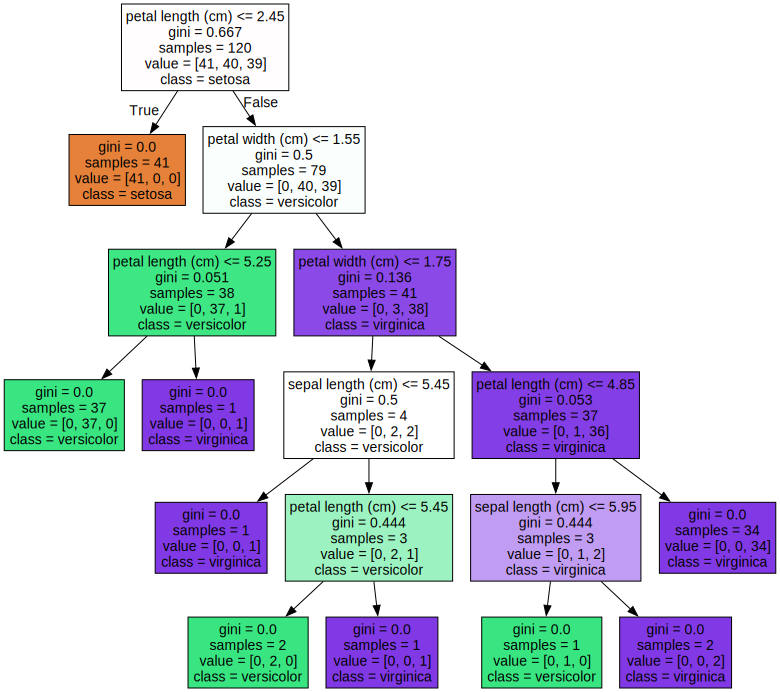

In [8]:
# 학습한 결과 트리 시각화
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pred = dt_clf.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, pred))
print('confusion_matrix:\n', confusion_matrix(y_test, pred))
print('classification_report:\n', classification_report(y_test, pred, target_names= iris.target_names))

accuracy_score: 0.9333333333333333
confusion_matrix:
 [[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
classification_report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

